In [1]:
from os.path import join

from pandas import read_csv

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

from sklearn.metrics import f1_score

In [2]:
data_dir = "/home/benoit/data/dreem_challenge/"
labels_path = "/home/benoit/data/dreem_challenge/y_train.csv"

labels = read_csv(labels_path)

In [3]:
import h5py

d = h5py.File(join(data_dir, 'X_train', 'X_train.h5'), 'r')

subject = d['index'][()]

In [4]:
from tools.processing import load_features, merge_features

features_1 = load_features(join(data_dir, "computed", 'base_1_train.csv'))
features_2 = load_features(join(data_dir, "computed", 'base_2_train.csv'))
features_3 = load_features(join(data_dir, "computed", 'base_3_train.csv'))
features_4 = load_features(join(data_dir, "computed", 'base_4_train.csv'))

f_train = merge_features([features_1, features_2, features_3, features_4])
y = labels['sleep_stage']
f_train = f_train.drop(['abs_index'], axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler
from neurocombat_sklearn import CombatModel

X_train, X_test, y_train, y_test, subject_train, subject_test = train_test_split(f_train, y, subject, test_size = 0.3)

# Features preprocessing (noramlization etc...)

scaler = StandardScaler().fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# combat = CombatModel()

# X_train = combat.fit_transform(X_train, subject_train.reshape(-1, 1).astype(str))
# X_test = combat.fit(X_test, subject_test.reshape(-1, 1).astype(str))

In [6]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_classif, mutual_info_classif

slct = SelectPercentile(mutual_info_classif, percentile=20)

X_train = slct.fit_transform(X_train, y_train)
X_test = slct.transform(X_test)


In [70]:
f_train.keys()[slct.get_support()]

Index(['eeg_0_log_energy', 'eeg_1_log_energy', 'eeg_4_log_ampl',
       'eeg_4_log_energy', 'eeg_5_log_energy', 'eeg_0_log_variance',
       'eeg_1_log_variance', 'eeg_4_log_variance', 'eeg_5_log_variance',
       'x_log_ampl', 'y_log_ampl', 'z_log_ampl', 'eeg_1_band_delta',
       'eeg_1_band_theta', 'eeg_2_band_delta', 'eeg_4_band_theta',
       'eeg_5_band_delta', 'eeg_5_band_theta', 'eeg_6_band_delta'],
      dtype='object')

In [60]:
# Model initialization

clf = RandomForestClassifier(n_estimators=10, 
                             criterion='gini', 
                             max_depth=None, 
#                             min_samples_leaf=0, 
                             class_weight=None,
                             bootstrap = True)

#clf = KNeighborsClassifier(n_neighbors = 15)
#clf= SVC(kernel = 'rbf', C = 0.01, class_weight='balanced')
#clf = GaussianNB()

In [65]:
# Hyperparameter tuning (k-fold etc...)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

scorer_f1 = make_scorer(f1_score, average="weighted")

param_grid = [
  {"n_estimators": [10,20, 50, 100], "max_depth":[None, 8, 5], "class_weight":[None, "balanced"],"bootstrap":[False, True]},
 ]

tuner = GridSearchCV(clf, param_grid, scorer_f1,  verbose=2)

res = tuner.fit(X_train, y_train)
print(res)

/home/benoit/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass scoring=make_scorer(f1_score, average=weighted) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] bootstrap=False, class_weight=None, max_depth=None, n_estimators=10 
[CV]  bootstrap=False, class_weight=None, max_depth=None, n_estimators=10, total=   1.7s
[CV] bootstrap=False, class_weight=None, max_depth=None, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  bootstrap=False, class_weight=None, max_depth=None, n_estimators=10, total=   1.6s
[CV] bootstrap=False, class_weight=None, max_depth=None, n_estimators=10 
[CV]  bootstrap=False, class_weight=None, max_depth=None, n_estimators=10, total=   1.6s
[CV] bootstrap=False, class_weight=None, max_depth=None, n_estimators=10 
[CV]  bootstrap=False, class_weight=None, max_depth=None, n_estimators=10, total=   1.6s
[CV] bootstrap=False, class_weight=None, max_depth=None, n_estimators=10 
[CV]  bootstrap=False, class_weight=None, max_depth=None, n_estimators=10, total=   1.6s
[CV] bootstrap=False, class_weight=None, max_depth=None, n_estimators=20 
[CV]  bootstrap=False, class_weight=None, max_depth=None, n_estimators=20, total=   3.3s
[CV] bootstrap=False, class_weight=None, max_depth=None, n_estimators=20 
[CV]  bootstrap=False, class_weight=None, max_depth=None, n_estimators=20, total=   3.2s
[CV] bootstrap=False, class_weight=None, max_depth=None, n_estimators=20 
[CV]  bootstrap=False,

[CV]  bootstrap=False, class_weight=None, max_depth=5, n_estimators=50, total=   2.9s
[CV] bootstrap=False, class_weight=None, max_depth=5, n_estimators=50 
[CV]  bootstrap=False, class_weight=None, max_depth=5, n_estimators=50, total=   2.9s
[CV] bootstrap=False, class_weight=None, max_depth=5, n_estimators=100 
[CV]  bootstrap=False, class_weight=None, max_depth=5, n_estimators=100, total=   5.8s
[CV] bootstrap=False, class_weight=None, max_depth=5, n_estimators=100 
[CV]  bootstrap=False, class_weight=None, max_depth=5, n_estimators=100, total=   5.7s
[CV] bootstrap=False, class_weight=None, max_depth=5, n_estimators=100 
[CV]  bootstrap=False, class_weight=None, max_depth=5, n_estimators=100, total=   5.7s
[CV] bootstrap=False, class_weight=None, max_depth=5, n_estimators=100 
[CV]  bootstrap=False, class_weight=None, max_depth=5, n_estimators=100, total=   5.7s
[CV] bootstrap=False, class_weight=None, max_depth=5, n_estimators=100 
[CV]  bootstrap=False, class_weight=None, max_dep

[CV]  bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=10, total=   0.7s
[CV] bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=10 
[CV]  bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=10, total=   0.6s
[CV] bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=20 
[CV]  bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=20, total=   1.2s
[CV] bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=20 
[CV]  bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=20, total=   1.2s
[CV] bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=20 
[CV]  bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=20, total=   1.2s
[CV] bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=20 
[CV]  bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=20, total=   1.2s
[CV] bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=20 
[CV]  boot

[CV]  bootstrap=True, class_weight=None, max_depth=8, n_estimators=50, total=   3.3s
[CV] bootstrap=True, class_weight=None, max_depth=8, n_estimators=100 
[CV]  bootstrap=True, class_weight=None, max_depth=8, n_estimators=100, total=   7.0s
[CV] bootstrap=True, class_weight=None, max_depth=8, n_estimators=100 
[CV]  bootstrap=True, class_weight=None, max_depth=8, n_estimators=100, total=   7.1s
[CV] bootstrap=True, class_weight=None, max_depth=8, n_estimators=100 
[CV]  bootstrap=True, class_weight=None, max_depth=8, n_estimators=100, total=   7.0s
[CV] bootstrap=True, class_weight=None, max_depth=8, n_estimators=100 
[CV]  bootstrap=True, class_weight=None, max_depth=8, n_estimators=100, total=   5.6s
[CV] bootstrap=True, class_weight=None, max_depth=8, n_estimators=100 
[CV]  bootstrap=True, class_weight=None, max_depth=8, n_estimators=100, total=   5.6s
[CV] bootstrap=True, class_weight=None, max_depth=5, n_estimators=10 .
[CV]  bootstrap=True, class_weight=None, max_depth=5, n_est

[CV]  bootstrap=True, class_weight=balanced, max_depth=8, n_estimators=20, total=   1.1s
[CV] bootstrap=True, class_weight=balanced, max_depth=8, n_estimators=20 
[CV]  bootstrap=True, class_weight=balanced, max_depth=8, n_estimators=20, total=   1.1s
[CV] bootstrap=True, class_weight=balanced, max_depth=8, n_estimators=20 
[CV]  bootstrap=True, class_weight=balanced, max_depth=8, n_estimators=20, total=   1.1s
[CV] bootstrap=True, class_weight=balanced, max_depth=8, n_estimators=20 
[CV]  bootstrap=True, class_weight=balanced, max_depth=8, n_estimators=20, total=   1.1s
[CV] bootstrap=True, class_weight=balanced, max_depth=8, n_estimators=20 
[CV]  bootstrap=True, class_weight=balanced, max_depth=8, n_estimators=20, total=   1.1s
[CV] bootstrap=True, class_weight=balanced, max_depth=8, n_estimators=50 
[CV]  bootstrap=True, class_weight=balanced, max_depth=8, n_estimators=50, total=   2.9s
[CV] bootstrap=True, class_weight=balanced, max_depth=8, n_estimators=50 
[CV]  bootstrap=True, 

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 15.9min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=10),
             param_grid=[{'bootstrap': [False, True],
                          'class_weight': [None, 'balanced'],
                          'max_depth': [None, 8, 5],
                          'n_estimators': [10, 20, 50, 100]}],
             scoring=make_scorer(f1_score, average=weighted), verbose=2)


In [71]:
res.best_params_
clf = res.best_estimator_

In [72]:
# Model training

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced')

In [73]:
# Model verifications

predictions_train = clf.predict(X_train)
print(f"Training score - {f1_score(predictions_train, y_train, average='weighted')}")

predictions_test = clf.predict(X_test)
print(f"Testing score - {f1_score(predictions_test, y_test, average='weighted')}")

Training score - 1.0
Testing score - 0.7456320809309039


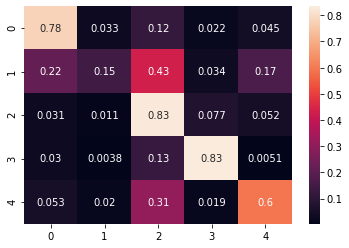

In [74]:
# Analyse des résultats 
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
from matplotlib.pyplot import show

cm = confusion_matrix(y_test, predictions_test, normalize="true")
ax = heatmap(cm, annot=True)
show()

In [75]:
from collections import Counter

print(Counter(y_test))
print(Counter(predictions_test))

Counter({2: 2819, 3: 1579, 4: 1504, 0: 1031, 1: 474})
Counter({2: 3335, 3: 1601, 4: 1179, 0: 1123, 1: 169})


In [78]:
# Loading evaluation data

f_1_e = load_features(join(data_dir, "computed", 'base_1_eval.csv'))
f_2_e = load_features(join(data_dir, "computed", 'base_2_eval.csv'))
f_3_e = load_features(join(data_dir, "computed", 'base_3_eval.csv'))
f_4_e = load_features(join(data_dir, "computed", 'base_4_eval.csv'))

f_eval = merge_features([f_1_e, f_2_e, f_3_e, f_4_e])

f_eval = f_eval.drop(['abs_index'], axis=1)

# assert f_train.keys() == f_eval.keys()

# Features preprocessing & Feature selection (both must be applied as for training features)

X_eval = scaler.transform(f_eval)
X_eval = slct.transform(X_eval)

In [79]:
# Making prediction on eval data

eval_pred = clf.predict(X_eval)

sub = read_csv(join(data_dir, 'sample_submission.csv'))
sub['sleep_stage'] = eval_pred

sub.to_csv("output/submission.csv", index=False)